In [4]:
import pandas as pd
import wordcloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS
from sklearn.cluster import KMeans
import os
import jieba
stop = [line.strip() for line in open('scu_stopwords.txt',encoding='utf-8').readlines() ]

names=['black_heart','fate_ubw','violet','dragon_maid']
indlist=[range(1,13),range(13,26), range(1,14),range(1,14)]

s_list=[]
for name_ind in range(4):
    name=names[name_ind]
    for i in indlist[name_ind]:
        tempString = ""
        File=open('''bilibili bullet screens_cleaned\{}\{}_p{}_cleaned.txt'''.format(name,name,i),'r',encoding='utf-8')
        for line in File.readlines():
            wordlist=jieba.cut(line)
            for word in wordlist:
                if word not in stop:
                    tempString = tempString + word + " "
        s_list.append(tempString)

MyCV = CountVectorizer(input='content')
MyTV = TfidfVectorizer(input='content')

My_DTM_C = MyCV.fit_transform(s_list)
My_DTM_T = MyTV.fit_transform(s_list)

MyColumnNames_C = MyCV.get_feature_names()
MyColumnNames_T = MyTV.get_feature_names()


df_short_C=pd.DataFrame(My_DTM_C.toarray(),columns=MyColumnNames_C)
df_short_T=pd.DataFrame(My_DTM_T.toarray(),columns=MyColumnNames_T)

In [5]:
f_sum=df_short_C.apply(sum,axis=1)
for i in range(0,48):
    df_short_C.iloc[i,:]=df_short_C.iloc[i,:]/f_sum[i]

f_sum=df_short_T.apply(sum,axis=1)
for i in range(0,48):
    df_short_T.iloc[i,:]=df_short_T.iloc[i,:]/f_sum[i]

In [11]:
labels=['black_heart']*12+['fate_ubw']*13+['violet']*13+['dragon_maid']*13
df_short_C['label']=labels
df_short_T['label']=labels


In [12]:
from sklearn.model_selection import train_test_split
import random as rd
TrainDF1, TestDF1 = train_test_split(df_short_C, test_size=0.3)
TrainDF2, TestDF2 = train_test_split(df_short_T, test_size=0.3)

In [13]:
Test1Labels=TestDF1["label"]
Test2Labels=TestDF2["label"]
TestDF1 = TestDF1.drop(["label"], axis=1)
TestDF2 = TestDF2.drop(["label"], axis=1)

In [14]:
Train1Labels=TrainDF1["label"]
Train2Labels=TrainDF2["label"]
TrainDF1 = TrainDF1.drop(["label"], axis=1)
TrainDF2 = TrainDF2.drop(["label"], axis=1)

In [15]:
from sklearn.naive_bayes import MultinomialNB

MyModelNB= MultinomialNB()

NB1=MyModelNB.fit(TrainDF1, Train1Labels)
Prediction1 = MyModelNB.predict(TestDF1)

NB2=MyModelNB.fit(TrainDF2, Train2Labels)
Prediction2 = MyModelNB.predict(TestDF2)

In [20]:
from sklearn.metrics import confusion_matrix
cnf_matrix1 = confusion_matrix(Test1Labels, Prediction1)
cnf_matrix2 = confusion_matrix(Test2Labels, Prediction2)
cnf_matrix1


array([[0, 3, 0, 0],
       [0, 3, 0, 0],
       [0, 5, 0, 0],
       [0, 5, 0, 0]], dtype=int64)

In [87]:
cnf_matrix2

array([[0, 4, 0, 0],
       [0, 3, 0, 0],
       [0, 1, 2, 0],
       [0, 6, 0, 0]], dtype=int64)

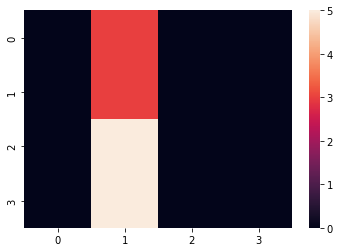

In [26]:
import numpy as np
import seaborn as sns
ax1 = sns.heatmap(cnf_matrix1)

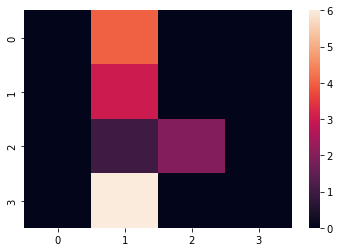

In [27]:
ax2 = sns.heatmap(cnf_matrix2)

In [39]:
importance1=pd.DataFrame(NB1.coef_).apply(np.linalg.norm,axis=0)

0        20.880462
1        20.880422
2        20.880316
3        20.879139
4        20.880591
           ...    
34183    20.880464
34184    20.880591
34185    20.880591
34186    20.879567
34187    20.880073
Length: 34188, dtype: float64

In [47]:
imp_sort1=list(importance)

In [55]:
sorted(imp_sort1)

20.52437082349593

In [56]:
importance2=pd.DataFrame(NB2.coef_).apply(np.linalg.norm,axis=0)
imp_sort2=list(importance)
sorted(imp_sort2)

[20.52437082349593,
 20.646858876558557,
 20.68298558077068,
 20.703006056600028,
 20.71238685716527,
 20.713230341706982,
 20.716172259914735,
 20.737178576502178,
 20.739878585427096,
 20.763304157037464,
 20.763954308393128,
 20.77008689291268,
 20.774917139392752,
 20.775942492859755,
 20.775942492859755,
 20.777490644672415,
 20.783448332093318,
 20.790950007124263,
 20.79114690573873,
 20.7926167351764,
 20.796456270090168,
 20.797177435497904,
 20.80035408260793,
 20.802568489754957,
 20.803446799644657,
 20.805932411669644,
 20.808200276130822,
 20.8106587551782,
 20.81091816336159,
 20.81091816336159,
 20.814460815335817,
 20.814820789233725,
 20.816188841870698,
 20.822222846015638,
 20.822258304052085,
 20.824577123766502,
 20.8252331900488,
 20.825312541704726,
 20.825667489089952,
 20.82632632975255,
 20.826739877916832,
 20.827627328493165,
 20.829592664610836,
 20.82977301200006,
 20.829779167545617,
 20.829900096964845,
 20.830811439198364,
 20.831148335277483,
 20.8311

In [81]:
import sklearn
SVM_Model_R1=sklearn.svm.SVC(C=2, kernel='rbf', 
                           verbose=True, gamma="auto")
SVM_Model_R2=sklearn.svm.SVC(C=2, kernel='rbf', 
                           verbose=True, gamma="auto")
SVM_Model_P1=sklearn.svm.SVC(C=1000, kernel='poly', degree=7,
                           verbose=True, gamma="auto")
SVM_Model_P2=sklearn.svm.SVC(C=1000, kernel='poly', degree=7,
                           verbose=True, gamma="auto")


In [82]:
SVM_Model_R1.fit(TrainDF1,Train1Labels)
SVM_Model_R2.fit(TrainDF2,Train2Labels)
SVM_Model_P1.fit(TrainDF1,Train1Labels)
SVM_Model_P2.fit(TrainDF2,Train2Labels)

[LibSVM][LibSVM][LibSVM][LibSVM]

SVC(C=1000, degree=7, gamma='auto', kernel='poly', verbose=True)

In [83]:
conf_matrix_R1 = confusion_matrix(Test1Labels, SVM_Model_R1.predict(TestDF1))
conf_matrix_R2 = confusion_matrix(Test2Labels, SVM_Model_R2.predict(TestDF2))
conf_matrix_P1 = confusion_matrix(Test1Labels, SVM_Model_P1.predict(TestDF1))
conf_matrix_P2 = confusion_matrix(Test2Labels, SVM_Model_P2.predict(TestDF2))

In [86]:
conf_matrix_R1

array([[0, 4, 0, 0],
       [0, 3, 0, 0],
       [0, 2, 1, 0],
       [0, 6, 0, 0]], dtype=int64)

In [88]:
conf_matrix_R2

array([[0, 0, 4, 0],
       [0, 0, 3, 0],
       [0, 0, 3, 0],
       [0, 0, 6, 0]], dtype=int64)

In [89]:
conf_matrix_P1

array([[3, 0, 0, 0],
       [3, 0, 0, 0],
       [5, 0, 0, 0],
       [5, 0, 0, 0]], dtype=int64)

In [90]:
conf_matrix_P2

array([[0, 4, 0, 0],
       [0, 3, 0, 0],
       [0, 2, 1, 0],
       [0, 6, 0, 0]], dtype=int64)